In [3]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Acropolis'

link = 'https://rally-base.com/2023/eko-acropolis-rally-2023/?ssId='
startat, no_ss=7824, int(15) # starting number of url, count of Special Stages
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [27]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [4]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,69,Rovanperä,RC1,00:01:32.9,57.35 0.00,00:00:00.0 00:00:00.0,1,Acropolis,1
2,2,4,Lappi Esa,RC1,00:01:33.2,57.17 0.20,00:00:00.3 00:00:00.3,1,Acropolis,2
3,3,11,Neuville,RC1,00:01:33.3,57.11 0.27,00:00:00.4 00:00:00.1,1,Acropolis,3
4,4,6,Sordo Dan,RC1,00:01:33.4,57.04 0.34,00:00:00.5 00:00:00.1,1,Acropolis,4
5,5,8,Tänak Ott,RC1,00:01:33.6,56.92 0.47,00:00:00.7 00:00:00.2,1,Acropolis,5
...,...,...,...,...,...,...,...,...,...,...
61,61,55,Galerakis,RC3,00:01:56.5,45.73 15.95,00:00:23.6 00:00:01.8,1,Acropolis,61
62,62,80,Kalamaras,RC4,00:02:00.4,44.25 18.58,00:00:27.5 00:00:03.9,1,Acropolis,62
63,63,51,Vassilakis,RC2,00:02:01.8,43.74 19.53,00:00:28.9 00:00:01.4,1,Acropolis,63
64,64,81,Panteli C,RC4,00:02:04.3,42.86 21.22,00:00:31.4 00:00:02.5,1,Acropolis,64


In [6]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [31]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv',index=False)

In [7]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView2, (str(rallyname) + '_Stages_Classification.png'))


In [8]:
rally2023_ClassView

,,,,Pos.
,,,ss,1
No.,Crew,Group,Race,
4,Lappi Esa,RC1,Acropolis,2
6,Sordo Dan,RC1,Acropolis,4
7,Loubet P.,RC1,Acropolis,8
8,Tänak Ott,RC1,Acropolis,5
9,Serderidis,RC1,Acropolis,32
...,...,...,...,...
77,Plagos Io,RC4,Acropolis,53
78,Papageorgi,RC4,Acropolis,65


In [9]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,69,Rovanperä,RC1,1,Acropolis,1,92.9
2,4,Lappi Esa,RC1,1,Acropolis,2,93.2
3,11,Neuville,RC1,1,Acropolis,3,93.3
4,6,Sordo Dan,RC1,1,Acropolis,4,93.4
5,8,Tänak Ott,RC1,1,Acropolis,5,93.6
...,...,...,...,...,...,...,...
61,55,Galerakis,RC3,1,Acropolis,61,116.5
62,80,Kalamaras,RC4,1,Acropolis,62,120.4
63,51,Vassilakis,RC2,1,Acropolis,63,121.8
64,81,Panteli C,RC4,1,Acropolis,64,124.3


In [11]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Group'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race      ss Group             
Acropolis 1  RC1           92.9
             RC2           95.0
             RC3          101.7
             RC4          109.7

In [16]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Group'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time
0,69,Rovanperä,RC1,1,Acropolis,1,92.9,92.9,92.9
1,4,Lappi Esa,RC1,1,Acropolis,2,93.2,92.9,92.9
2,11,Neuville,RC1,1,Acropolis,3,93.3,92.9,92.9
3,6,Sordo Dan,RC1,1,Acropolis,4,93.4,92.9,92.9
4,8,Tänak Ott,RC1,1,Acropolis,5,93.6,92.9,92.9
...,...,...,...,...,...,...,...,...,...
60,76,Chatzimark,RC4,1,Acropolis,55,110.4,109.7,92.9
61,75,Lefkaditis,RC4,1,Acropolis,59,113.1,109.7,92.9
62,80,Kalamaras,RC4,1,Acropolis,62,120.4,109.7,92.9
63,81,Panteli C,RC4,1,Acropolis,64,124.3,109.7,92.9


In [17]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F['diff_Gr']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_Gr%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
0,69,Rovanperä,RC1,1,Acropolis,1,92.9,92.9,92.9,0.0,0.000000,01,0.0,0.000000
1,4,Lappi Esa,RC1,1,Acropolis,2,93.2,92.9,92.9,0.3,0.322928,01,0.3,0.322928
2,11,Neuville,RC1,1,Acropolis,3,93.3,92.9,92.9,0.4,0.430571,01,0.4,0.430571
3,6,Sordo Dan,RC1,1,Acropolis,4,93.4,92.9,92.9,0.5,0.538213,01,0.5,0.538213
4,8,Tänak Ott,RC1,1,Acropolis,5,93.6,92.9,92.9,0.7,0.753498,01,0.7,0.753498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,76,Chatzimark,RC4,1,Acropolis,55,110.4,109.7,92.9,17.5,18.837460,01,0.7,0.638104
61,75,Lefkaditis,RC4,1,Acropolis,59,113.1,109.7,92.9,20.2,21.743811,01,3.4,3.099362
62,80,Kalamaras,RC4,1,Acropolis,62,120.4,109.7,92.9,27.5,29.601722,01,10.7,9.753874
63,81,Panteli C,RC4,1,Acropolis,64,124.3,109.7,92.9,31.4,33.799785,01,14.6,13.309025


In [57]:
Group = 'RC1'
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains(Group)]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
0,69,Rovanperä,RC1,1,Acropolis,1,92.9,92.9,92.9,0.0,0.000000,01,0.0,0.000000
1,4,Lappi Esa,RC1,1,Acropolis,2,93.2,92.9,92.9,0.3,0.322928,01,0.3,0.322928
2,11,Neuville,RC1,1,Acropolis,3,93.3,92.9,92.9,0.4,0.430571,01,0.4,0.430571
3,6,Sordo Dan,RC1,1,Acropolis,4,93.4,92.9,92.9,0.5,0.538213,01,0.5,0.538213
4,8,Tänak Ott,RC1,1,Acropolis,5,93.6,92.9,92.9,0.7,0.753498,01,0.7,0.753498
5,17,Ogier S.,RC1,1,Acropolis,6,94.2,92.9,92.9,1.3,1.399354,01,1.3,1.399354
6,18,Katsuta T,RC1,1,Acropolis,7,94.2,92.9,92.9,1.3,1.399354,01,1.3,1.399354
7,7,Loubet P.,RC1,1,Acropolis,8,94.6,92.9,92.9,1.7,1.829925,01,1.7,1.829925
8,33,Evans Elf,RC1,1,Acropolis,12,95.7,92.9,92.9,2.8,3.013994,01,2.8,3.013994
9,9,Serderidis,RC1,1,Acropolis,32,103.5,92.9,92.9,10.6,11.410118,01,10.6,11.410118


In [58]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
0,69,Rovanperä,RC1,1,Acropolis,1,92.9,92.9,92.9,0.0,0.000000,01,0.0,0.000000
1,4,Lappi Esa,RC1,1,Acropolis,2,93.2,92.9,92.9,0.3,0.322928,01,0.3,0.322928
2,11,Neuville,RC1,1,Acropolis,3,93.3,92.9,92.9,0.4,0.430571,01,0.4,0.430571
3,6,Sordo Dan,RC1,1,Acropolis,4,93.4,92.9,92.9,0.5,0.538213,01,0.5,0.538213
4,8,Tänak Ott,RC1,1,Acropolis,5,93.6,92.9,92.9,0.7,0.753498,01,0.7,0.753498
5,17,Ogier S.,RC1,1,Acropolis,6,94.2,92.9,92.9,1.3,1.399354,01,1.3,1.399354
6,18,Katsuta T,RC1,1,Acropolis,7,94.2,92.9,92.9,1.3,1.399354,01,1.3,1.399354
7,7,Loubet P.,RC1,1,Acropolis,8,94.6,92.9,92.9,1.7,1.829925,01,1.7,1.829925
8,33,Evans Elf,RC1,1,Acropolis,12,95.7,92.9,92.9,2.8,3.013994,01,2.8,3.013994
9,9,Serderidis,RC1,1,Acropolis,32,103.5,92.9,92.9,10.6,11.410118,01,10.6,11.410118


In [59]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_Gr', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race,Acropolis
SS.,01
Crew,
Evans Elf,2.8
Katsuta T,1.3
Lappi Esa,0.3
Loubet P.,1.7
Neuville,0.4
Ogier S.,1.3
Rovanperä,0.0
Serderidis,10.6


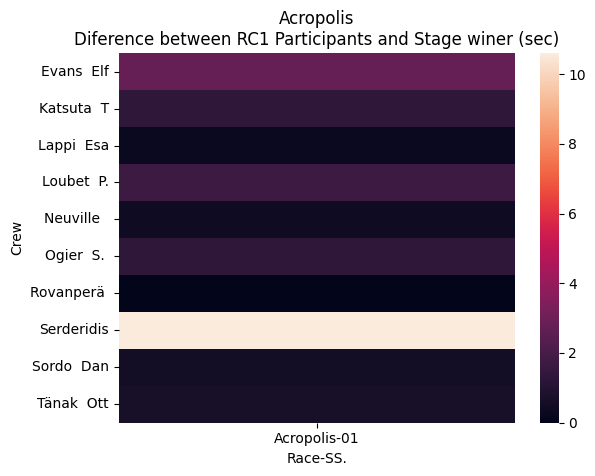

In [60]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + ".png")

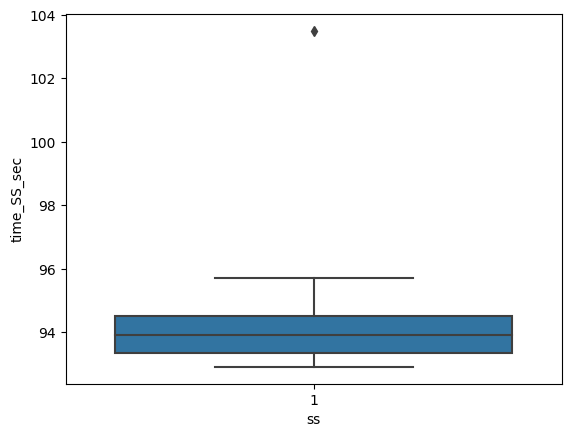

In [61]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
plt.savefig("Boxplot_" + Group + ".png")

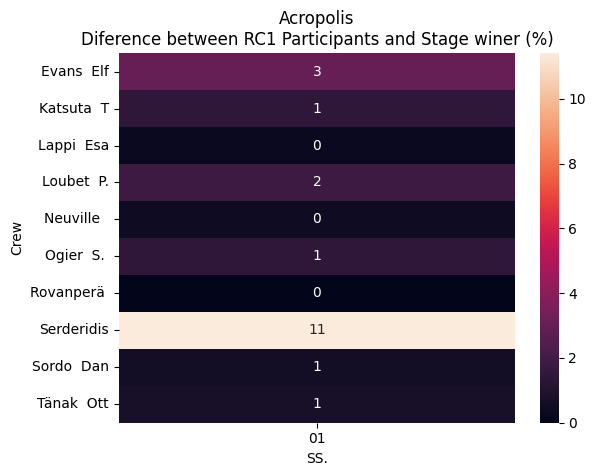

In [62]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff_Gr%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Stage winer (%)')
plt.savefig( Group + ".jpg")